<a href="https://colab.research.google.com/github/moomonkey/tf_lab/blob/master/Fashion_mnist_bas3D_matrix5_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Denna kod använder keras och tf, med Fashion-mnist databas

# Denna kod är baserad på dokumentation i Francois Chollets "Deep learning with Python", tensorflow API, docs, och tutorials: https://www.tensorflow.org/tutorials/keras/basic_classification, Margaret Maynard-Reids https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a, och Keras dokumentation, https://keras.io/examples/mnist_cnn/. Visualisering är inkluderad för att verifiera koden.

# Imports

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importera dataset Fashion-mnist, vilket har 10 kategorier, i träningsdata, träningslabel för att träna modellen, testdata och testlabels för att testa modellen

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Se träningsdata

In [207]:
print("Träningsbilder: ", train_img.shape, "Träningsetiketter: ", train_labels.shape) #består av 60000 exempel i 28*28 pixelformat

Träningsbilder:  (60000, 28, 28) Träningsetiketter:  (60000,)


# Se testdatan

In [208]:
print("Testbilder: ", test_img.shape, "Testetiketter: ", test_labels.shape) #består av 10000 exempel i 28*28 format

Testbilder:  (10000, 28, 28) Testetiketter:  (10000,)


# Se första bilden i datasetet och pixelvärdet

AxesImage(54,36;267.84x217.44) <matplotlib.colorbar.Colorbar object at 0x7f58dd5335c0>


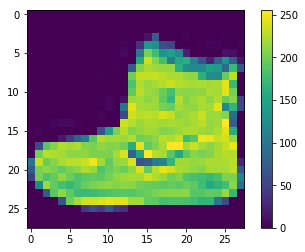

In [209]:
print(plt.imshow(train_img[0]), plt.colorbar())

# Skapa etiketter för datasetets kategorier

In [0]:
fashion_cat = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Boot']

#Visa bilder med kategorier

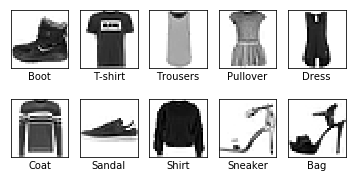

In [211]:
plt.figure(figsize=(6,3)) #utan prediction
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_cat[i-1])
plt.show()

#Förbered datans form. Normalize data

In [212]:
import pandas as pd
train_img = train_img.reshape(-1,28,28,1)
print(train_img.shape)
test_img = test_img.reshape(-1,28,28,1)
print(test_img.shape)
#Ändra typ till fl32
train_img = train_img.astype('float32') / 255 #Normalisera pixeldimension från 0-255 till 0-1
test_img = test_img.astype('float32') / 255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Encode etiketter

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [214]:
print(train_labels.shape) #se output
print(test_labels.shape)

(60000, 10)
(10000, 10)


# Definiera lager i modell

In [222]:
model = tf.keras.Sequential()
#Lager ett med max-pooling. Definiera input shape i första lagret
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1))) #conv2D spatial conv av bilder
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))#storlek på poolingfönster
model.add(tf.keras.layers.Dropout(0.3))
#lager två med pooling
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
#Flatten
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu')) #Dense är 100 neurons "fully connected"
model.add(tf.keras.layers.Dropout(0.3)) # lade till dropout för att regulera overfit
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))#probabilty score (10 neurons) till kategorierna

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)             

# Kompilera modellen

In [0]:

model.compile(optimizer='adam',#stochastic gradient decent, fungerade bättre än 'rmsprop'
              loss='categorical_crossentropy', #loss funktion categorical (inte sparse_categorical_crossentropy labels får inte plats)
              metrics=['accuracy'])

# Training model med epoch (iteration)

In [224]:
model.fit(train_img, train_labels, epochs=20) #overfitting med 10 epochs, 97-93%, loss blev mindre vid 7 epochs. Näst sista version med 20 epochs, overfit 99-95%, sista version med dropout: overfitting=97-93%, score 99%

Epoch 1/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.5549 - acc: 0.7956
Epoch 2/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.3985 - acc: 0.8563
Epoch 3/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.3526 - acc: 0.8708
Epoch 4/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.3280 - acc: 0.8799
Epoch 5/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.3106 - acc: 0.8863
Epoch 6/20
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2958 - acc: 0.8908
Epoch 7/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2806 - acc: 0.8957
Epoch 8/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2758 - acc: 0.8992
Epoch 9/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2655 - acc: 0.9026
Epoch 10/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 

# Använd test data på modellen för att jämföra med träningsdata

In [225]:
model.fit(test_img, test_labels, epochs=20) 

Epoch 1/20
10000/10000 [==============================] - 12s 1ms/sample - loss: 0.2999 - acc: 0.8948
Epoch 2/20
10000/10000 [==============================] - 12s 1ms/sample - loss: 0.2839 - acc: 0.8977
Epoch 3/20
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2611 - acc: 0.9014
Epoch 4/20
10000/10000 [==============================] - 12s 1ms/sample - loss: 0.2501 - acc: 0.9055
Epoch 5/20
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2409 - acc: 0.9106
Epoch 6/20
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2396 - acc: 0.9126
Epoch 7/20
10000/10000 [==============================] - 12s 1ms/sample - loss: 0.2293 - acc: 0.9140
Epoch 8/20
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2221 - acc: 0.9171
Epoch 9/20
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2104 - acc: 0.9211
Epoch 10/20
10000/10000 [==============================] - 12s 1ms/sample - loss: 

#Evaluera och jämför training data med test data

In [226]:
train_loss, train_acc = model.evaluate(train_img, train_labels)
test_loss, test_acc = model.evaluate(test_img, test_labels) #den är overfit med 99% till 93%
print('\nTrain noggrannhet: ', int(train_acc*100),'%', '\nTrain loss', train_loss)
print('\nTest noggrannhet: ', int(test_acc*100),'%', '\nTest loss', test_loss)

10000/10000 [==============================] - 4s 364us/sample - loss: 0.0756 - acc: 0.9744

Train noggrannhet:  93 % 
Train loss 0.16899847033011417

Test noggrannhet:  97 % 
Test loss 0.07564697565734387


# Resultat av evaluering: Bäst testresultat av klassificering

In [0]:
predictions = model.predict(test_img)

In [155]:
print("Etikett_nummer: ",np.argmax(predictions[0]), '\n'"Katergori: ", fashion_cat[np.argmax(predictions[0])])

Etikett_nummer:  9 
Katergori:  Boot


In [156]:
# Evaluate the model on test set
score = model.evaluate(test_img, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9991
